In [2]:
%%time

import matplotlib.pyplot as plt
import xarray as xr
from xcube.core.store import new_data_store, get_data_store_params_schema

from xcube_stac.utils import reproject_bbox

CPU times: user 4.42 s, sys: 311 ms, total: 4.73 s
Wall time: 2.94 s


In [3]:
xr.set_options(display_expand_attrs=False)

In [4]:
credentials = {
    "key": "O0M0CUQIDQO9TDZ4D8NR",
    "secret": "qPUyXs9G6j8on6MY5KPhQNHuA5uZTqxEscrbBCGx",
}

In [5]:
%%time
store = new_data_store("stac-cdse", **credentials)

CPU times: user 72.2 ms, sys: 15.1 ms, total: 87.2 ms
Wall time: 262 ms


In [38]:
%%time
descriptors = list(
    store.search_data(
        collections=["sentinel-2-l2a"],
        bbox=[15, 37.2, 15.01, 37.21],
        time_range=["2020-06-15", "2020-06-17"],
    )
)
[d.to_dict() for d in descriptors]

CPU times: user 65.3 ms, sys: 2.08 ms, total: 67.4 ms
Wall time: 939 ms


[{'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200616T095029_N0500_R079_T33SWB_20230403T093828',
  'data_type': 'dataset',
  'bbox': [14.999772, 36.954886, 15.906611, 37.94759],
  'time_range': ('2020-06-16T09:50:29.024Z', '2020-06-16T09:50:29.024Z')},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200616T095029_N0500_R079_T33SVB_20230403T093828',
  'data_type': 'dataset',
  'bbox': [13.861471, 36.952565, 15.111086, 37.947537],
  'time_range': ('2020-06-16T09:50:29.024Z', '2020-06-16T09:50:29.024Z')}]

In [41]:
%%time
ds = store.open_data(
    "collections/sentinel-2-l2a/items/S2B_MSIL2A_20200616T095029_N0500_R079_T33SVB_20230403T093828",
    asset_names=["B04", "SCL"],
)
ds

CPU times: user 191 ms, sys: 6.12 ms, total: 197 ms
Wall time: 749 ms


<xarray.Dataset> Size: 965MB
Dimensions:      (y: 10980, x: 10980)
Coordinates:
  * x            (x) float64 88kB 4e+05 4e+05 4e+05 ... 5.097e+05 5.098e+05
  * y            (y) float64 88kB 4.2e+06 4.2e+06 4.2e+06 ... 4.09e+06 4.09e+06
    spatial_ref  int64 8B 0
Data variables:
    B04          (y, x) float32 482MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    SCL          (y, x) float32 482MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes: (3)

In [45]:
%%time
store_pc = new_data_store("stac-pc")

CPU times: user 6.37 ms, sys: 1.9 ms, total: 8.28 ms
Wall time: 223 ms


In [46]:
%%time
descriptors = list(
    store_pc.search_data(
        collections=["sentinel-2-l2a"],
        bbox=[15, 37.2, 15.01, 37.21],
        time_range=["2020-06-15", "2020-06-17"],
    )
)
[d.to_dict() for d in descriptors]

CPU times: user 44.4 ms, sys: 195 μs, total: 44.6 ms
Wall time: 993 ms


[{'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200616T095029_R079_T33SWB_20200823T002429',
  'data_type': 'dataset',
  'bbox': [14.999772364545233,
   36.9548855718385,
   15.906624046207577,
   37.947589571993284],
  'time_range': ('2020-06-16T09:50:29.024000Z', None)},
 {'data_id': 'collections/sentinel-2-l2a/items/S2B_MSIL2A_20200616T095029_R079_T33SVB_20200823T002425',
  'data_type': 'dataset',
  'bbox': [13.86147092120095,
   36.95256487264268,
   15.111086005832188,
   37.94753713280259],
  'time_range': ('2020-06-16T09:50:29.024000Z', None)}]

In [47]:
%%time
ds_pc = store_pc.open_data(
    "collections/sentinel-2-l2a/items/S2B_MSIL2A_20200616T095029_R079_T33SVB_20200823T002425",
    asset_names=["B04", "SCL"],
)
ds_pc

CPU times: user 130 ms, sys: 1.97 ms, total: 132 ms
Wall time: 865 ms


<xarray.Dataset> Size: 603MB
Dimensions:      (y: 10980, x: 10980)
Coordinates:
  * x            (x) float64 88kB 4e+05 4e+05 4e+05 ... 5.097e+05 5.098e+05
  * y            (y) float64 88kB 4.2e+06 4.2e+06 4.2e+06 ... 4.09e+06 4.09e+06
    spatial_ref  int64 8B 0
Data variables:
    B04          (y, x) float32 482MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    SCL          (y, x) uint8 121MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
Attributes: (3)

CPU times: user 396 ms, sys: 10.8 ms, total: 407 ms
Wall time: 405 ms


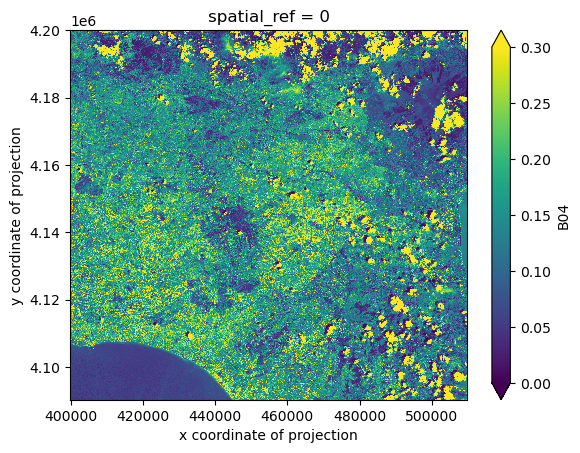

In [48]:
%%time
ds.B04[::10, ::10].plot(vmin=0.0, vmax=0.3)

CPU times: user 409 ms, sys: 4.89 ms, total: 414 ms
Wall time: 413 ms


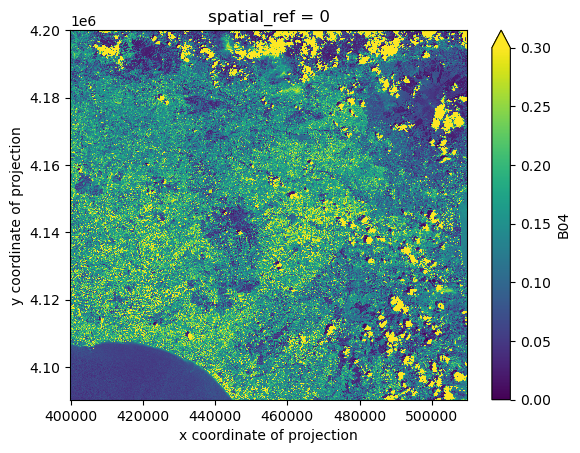

In [54]:
%%time
ds_pc.B04[::10, ::10].plot(vmin=0.0, vmax=0.3)

CPU times: user 674 ms, sys: 9.74 ms, total: 684 ms
Wall time: 682 ms


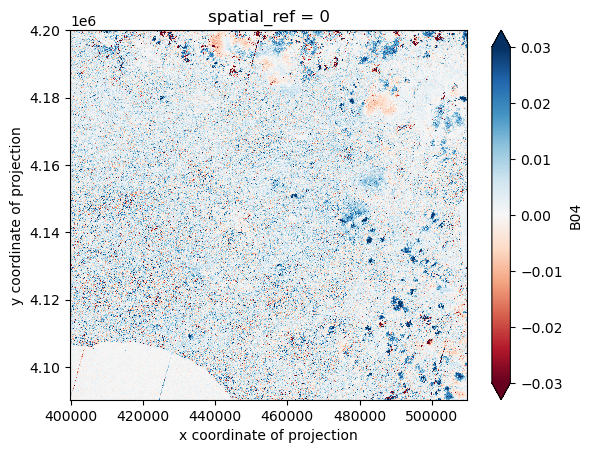

In [53]:
%%time
((ds.B04[::10, ::10]) - ds_pc.B04[::10, ::10]).plot(vmin=-0.0300, vmax=0.0300, cmap="RdBu")

CPU times: user 5.55 s, sys: 862 ms, total: 6.42 s
Wall time: 13 s


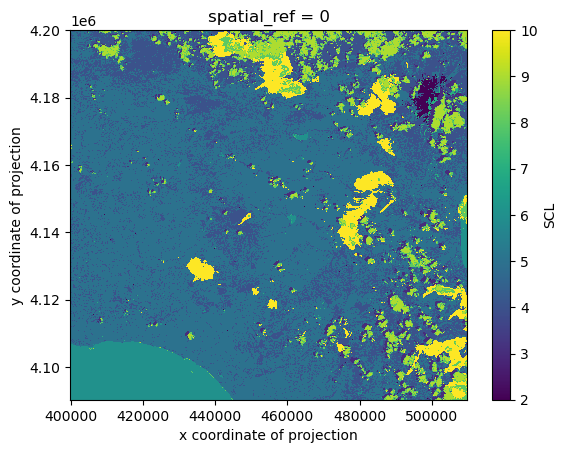

In [51]:
%%time
ds.SCL[::10, ::10].plot()